In [6]:
import dm_den_viz
import dm_den
import paths
import cropper
import fitting
import lmfit
import pickle
import staudt_utils
import numpy as np
import pandas as pd
from importlib import reload
from importlib import reload
from IPython.display import display, Latex
from astropy import units as u, constants as c

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['axes.labelsize']=15.
rcParams['xtick.labelsize'] = 12.
rcParams['ytick.labelsize'] = 12.
rcParams['figure.dpi'] = 110.
rcParams['legend.fontsize'] = 15.

mls = 11. #marker label size
#result_figsize = (4.5,3.5) #figure size for the main result plots (rho & sigma)
result_figsize = (4.5,4.8) #figure size for the main result plots (rho & sigma)

In [4]:
sigmoid_damped_eqnum = 24
mao_eqnum = None

In [5]:
with open(paths.data + 'data_raw.pkl', 'rb') as f:
    results_sigmoid_damped = pickle.load(f)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

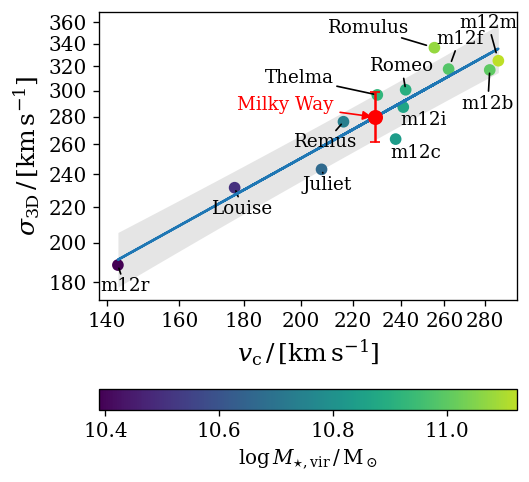

[array([[279.57467057]]), array([[19.39544748, 18.25139687]])]

In [5]:
reload(dm_den_viz)
dm_den_viz.plt_vs_vc(
     'disp_dm_disc_cyl', 
     source_fname = 'dm_stats_dz1.0_20230626.h5',
     tgt_fname='disp_vs_vphi.png',
     linear_dyfrac_data=results_sigmoid_damped['stdev_linear_dispdiff'],
     update_val=True,
     figsize=result_figsize, labelsize=mls, 
     adjust_text_kwargs={'force_static': (0.3, 3.),
                         'force_text': (0.4, 0.4),
                         #'force_explode': (0.09, 0.03)
                        },
     label_overrides={'Romulus': (2.1, 350., True),
                      'm12m': (2.67, 355., True),
                      'm12f': (2.56, 340., True)
                     },
     dpi_show=120, 
     xtickspace=0.2, 
     ytickspace=20.,
     verbose=False, beta_sig=1.-0.682, 
     color='masses')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

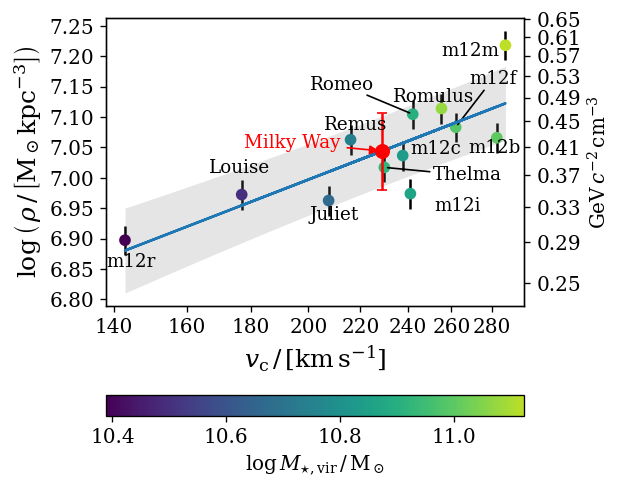

In [6]:
reload(dm_den_viz)
reload(dm_den)
reload(staudt_utils)
rho_hat = dm_den_viz.plt_vs_vc(
       'den_disc',
       source_fname = 'dm_stats_dz1.0_20230626.h5',
       tgt_fname='den_vs_vphi.png',
       linear_dyfrac_data=results_sigmoid_damped['stdev_linear_dendiff'],
       update_val=True,
       adjust_text_kwargs={'force_static': (0.8, 3.),
                           'force_text': (0.6, 0.6),
                           'force_explode': (0.1, 0.08),
                           'min_arrow_len': 35.
                          },
       label_overrides={'m12m': (2.55, 7.2, False),
                        'm12c': (2.41, 7.04, False)},
       figsize=result_figsize, labelsize=mls, 
       verbose=False,
       v0=dm_den_viz.vc_eilers,
       dv0=dm_den_viz.dvc_eilers,
       dpi_show=120,
       xtickspace=0.2, beta_sig=1.-0.682, 
       color='masses')

1.74 kpc arclength bins
15.04% max den diff
5.86% max disp diff


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

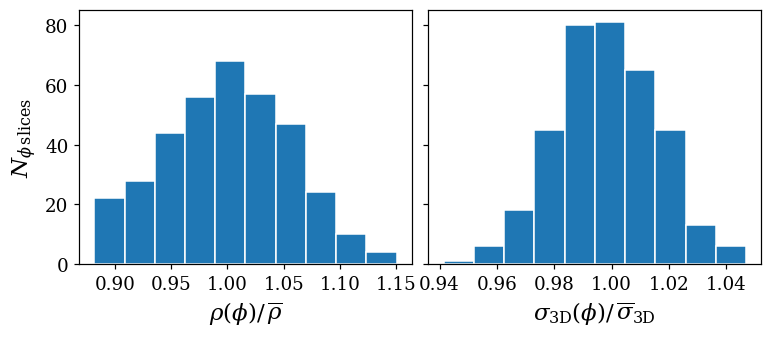

In [7]:
reload(dm_den_viz)
print('{0:0.2f} kpc arclength bins'.format(2.*np.pi*8.3/30.))
dm_den_viz.plt_disc_diffs('dm_stats_dz1.0_20230626.h5',
                          'den_disp_dict_N30_dz1.0_20230707.pkl',
                          only_linear=True, figsize=(8,3),
                          tgt_fname='disc_diffs.png',
                          update_val=True)

<IPython.core.display.Latex object>

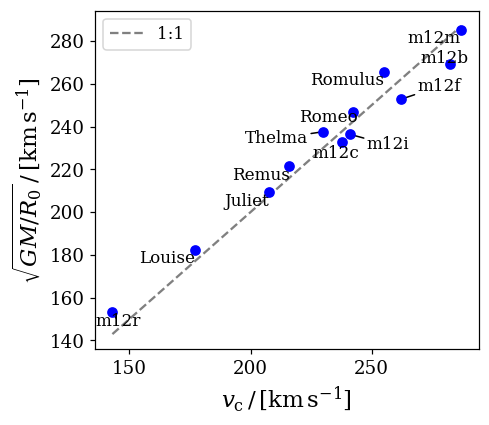

In [8]:
reload(dm_den_viz)
dm_den_viz.plt_gmr_vs_vc(tgt_fname='gmr_vs_vc.png', 
                         figsize=(4.5,4), 
                         adjust_text_kwargs={#'force_static': (.8, .8),
                                             #'force_text': (0.6, 0.6),
                                             #'force_explode': (5., 5.),
                                             #'min_arrow_len': 23.
                                            },
                         #label_overrides={'m12r': (2.15, 2.22, True),
                         #                 'Louise': (2.23, 2.3, True),
                         #                 'Remus': (2.278, 2.34, False),
                         #                 'Juliet': (2.33, 2.3, True),
                         #                 'm12i': (2.39, 2.36, False),
                         #                 'm12f': (2.42, 2.388, False),
                         #                 'm12m': (2.41, 2.46, False)}
                        )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

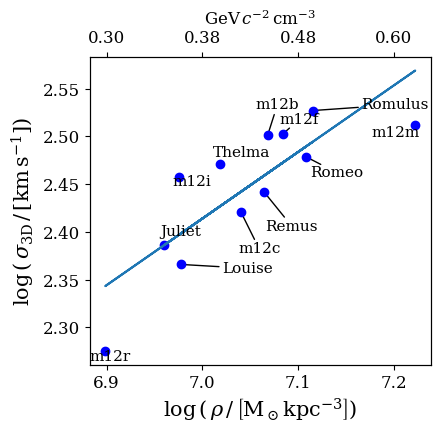

In [9]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   'den_disc', 'disp_dm_disc_cyl',
                   dm_den_viz.den_label, dm_den_viz.disp_label,
                   'log', 'log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'force_static':(1.7, 1.7),
                                       'force_explode':(0.05,0.3),
                                       'min_arrow_len':10.},
                   labelsize=mls, show_formula='outside',
                   tgt_fname='disp_vs_den.png',
                   #ax_slr_kwargs={'prediction_x':[[dm_den_viz.rho_sofu],
                   #                               10.**rho_hat[0][0]],
                   #               'dX':[[dm_den_viz.drho_sofu],
                   #                      rho_hat[1][0] \
                   #                      *np.sqrt(10.**(rho_hat[0][0][0]*2.) \
                   #                               * np.log(10.)**2.)]}
                      )
# The extra math on the error bar from my prediction is to get the
# log error bar into a linear error bar that the program will then
# convert back into the original error bar. (The program expects linear
# error bars, even though it might display log error bars in the end.)

#print(_)

In [10]:
df = dm_den.load_data('dm_stats_dz1.0_20230626.h5').drop(['m12w', 'm12z'])
cor_df = df \
    [['disp_dm_disc_cyl',
      'den_disc',
      'v_dot_phihat_disc(T<=1e3)',
      'vcirc']] \
    .rename(columns={'disp_dm_disc_cyl': '$\sigma_\mathrm{3D}$', 
                     'den_disc': '$\rho$',
                     'v_dot_phihat_disc(T<=1e3)': '$v_c$',
                     'vcirc': '$\sqrt{Gm/R_0}$'}) \
    .corr()
for i in range(cor_df.shape[0]):
    for j in range(cor_df.shape[1]):
        if j>i:
            cor_df.iloc[i,j] = ''
caption = 'Correlations between the four variables of interest'
with open(paths.tables+'corr.tex','w') as tf:
    l = cor_df.to_latex(escape=False,
                        float_format='{:0.2f}'.format,
                        caption=caption,
                        label='table:corr')
    tf.write(l)
cor_df

/var/folders/94/r7q1ltfd5cdf55qhtt067d380000gn/T/ipykernel_3749/3455581519.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  l = cor_df.to_latex(escape=False,


,$\sigma_\mathrm{3D}$,$\rho$,$v_c$,$\sqrt{Gm/R_0}$
$\sigma_\mathrm{3D}$,1.000000,,,
$\rho$,0.787835,1.0,,
$v_c$,0.933800,0.787627,1.0,
$\sqrt{Gm/R_0}$,0.964623,0.833963,0.986555,1.0


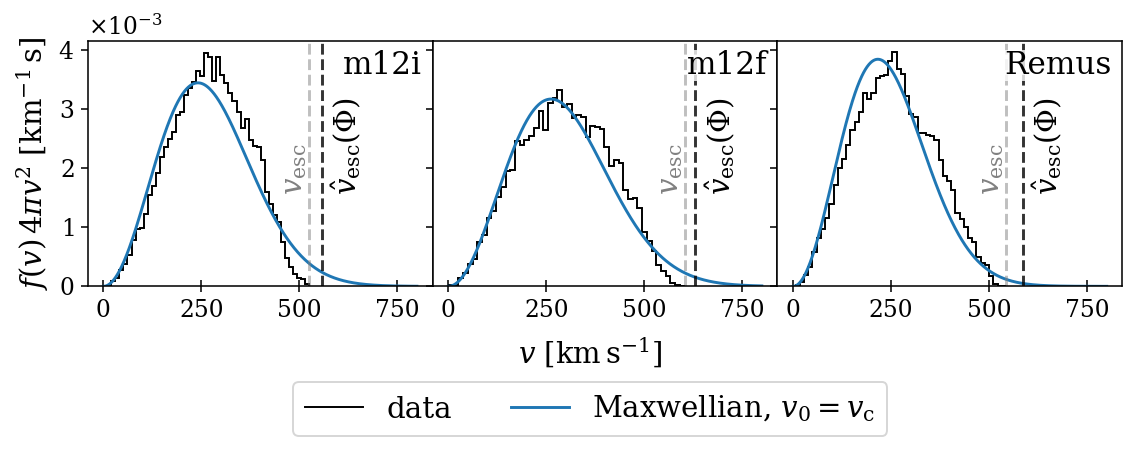

In [15]:
reload(dm_den_viz)
reload(dm_den)
dm_den_viz.plt_naive(gals=['m12i', 'm12f', 'Remus'], 
                     df_source='dm_stats_dz1.0_20230724.h5',
                     vcut_type='lim',
                     tgt_fname='distribs_from_predicted_sigma.png',
                     show_sigma_vc=False, show_exp=False, show_sigma_meas=False)

100% |##########################################################################################################################################################################################################################|


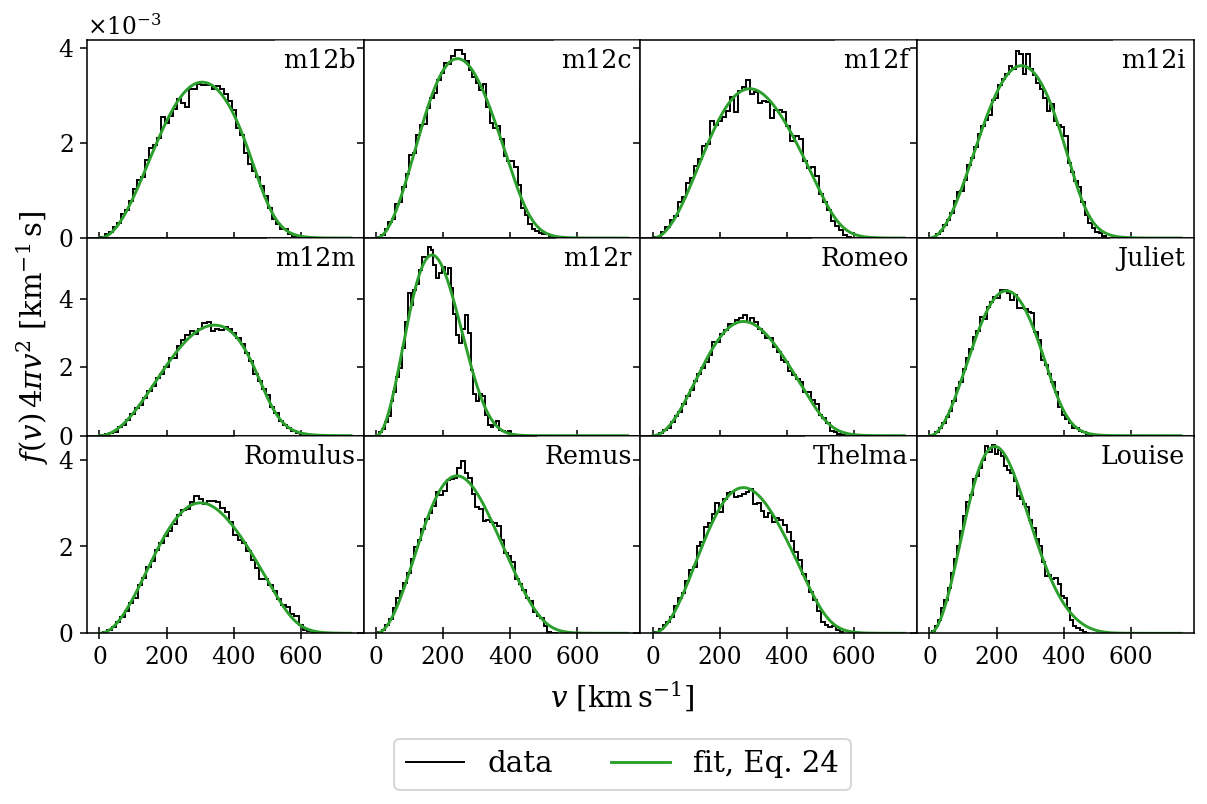

{'m12b': 489.70574631266095,
 'm12c': 448.4635501353798,
 'm12f': 539.6556784715884,
 'm12i': 443.88261456681596,
 'm12m': 493.7694629671164,
 'm12r': 346.1469152145058,
 'Romeo': 514.2985411260869,
 'Juliet': 384.0961633768651,
 'Romulus': 567.0196866606926,
 'Remus': 499.1516802849354,
 'Thelma': 509.64788338866924,
 'Louise': 513.1296257358294}

In [12]:
fitting.fit_vdamp(gals='discs',
                  df_source='dm_stats_dz1.0_20230724.h5',
                  tgt_fname='vdamp_fits.png', 
                  vcut_type='lim_fit',
                  show_max_fit=False,
                  show_mao_fixed=False,
                  show_mao_free=False,
                  sigmoid_damped_eqnum=sigmoid_damped_eqnum,
                  show_rms=False,
                  xtickspace=200.)

reload(dm_den_viz)
dm_den_viz.plt_universal_prefit(results_sigmoid_damped, ['m12i', 'Remus'],
                                tgt_fname='universal_fits.png')

100% |##########################################################################################################################################################################################################################|


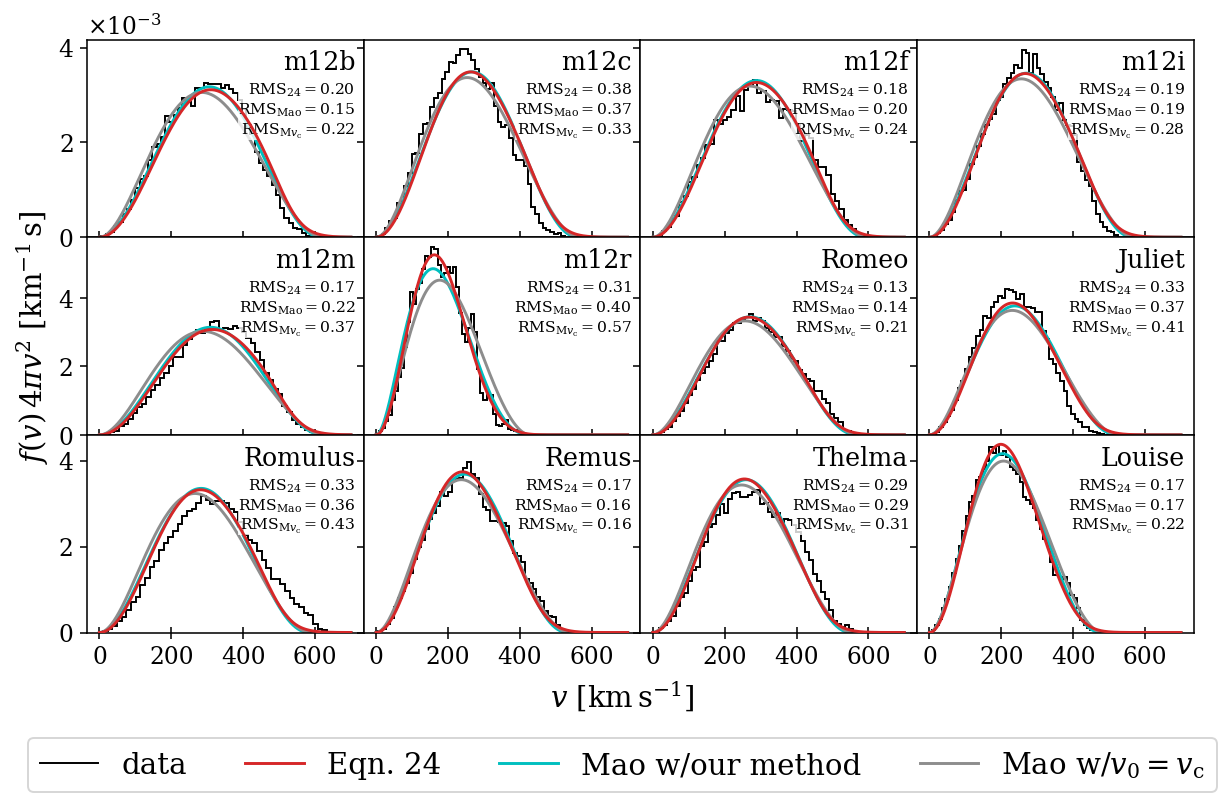

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
reload(dm_den_viz)
dm_den_viz.plt_universal_prefit(results_sigmoid_damped, 
                                'dm_stats_dz1.0_20230724.h5',
                                gals='discs',
                                tgt_fname='mao_comparison.png', 
                                xtickspace=200.,
                                show_bands=False,
                                show_mao_prediction=True, 
                                show_mao_naive=True,
                                show_sigmoid_hard=False, 
                                show_sigmoid_exp=False,
                                show_rms=True, scale='linear', 
                                prediction_vcut_type='lim_fit',
                                std_vcut_type='lim_fit',
                                sigmoid_damped_eqnum=sigmoid_damped_eqnum,
                                mao_eqnum=mao_eqnum)

Using ddfrac = 0.09600
Using dhfrac = 0.05760


100% |##########################################################################################################################################################################################################################|


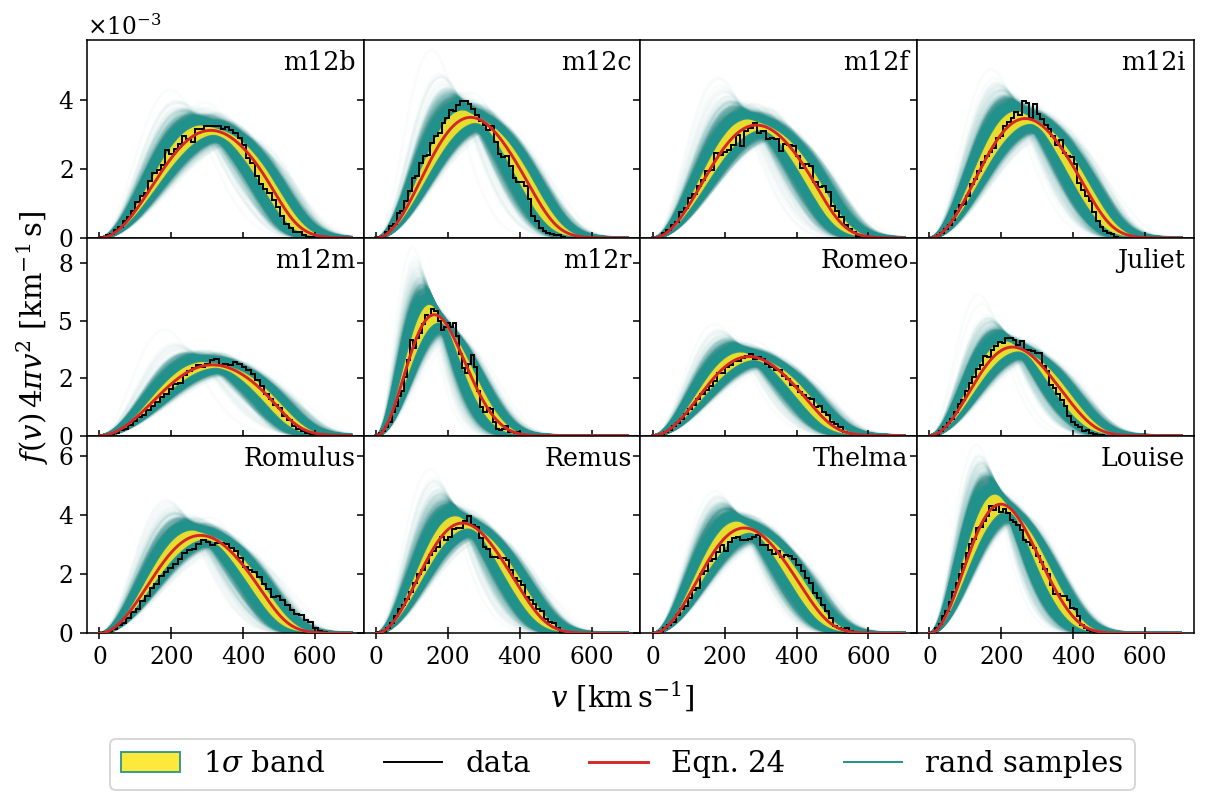

In [14]:
reload(dm_den_viz)
reload(fitting)
dm_den_viz.plt_universal_prefit(results_sigmoid_damped, 
                                df_source='dm_stats_dz1.0_20230724.h5',
                                xtickspace=200.,
                                tgt_fname='univ_fit_all.png',
                                show_mao_prediction=False,
                                prediction_vcut_type=None,
                                sigmoid_damped_eqnum=sigmoid_damped_eqnum)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

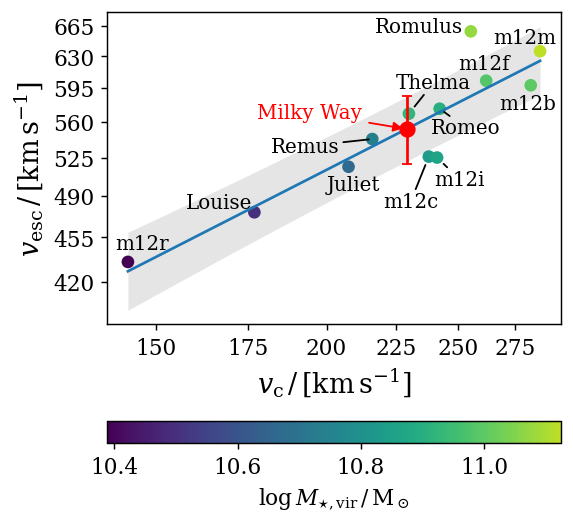

In [15]:
reload(dm_den_viz)
dm_den_viz.plt_vesc_vc_vs_vc('dm_stats_dz1.0_20230724.h5', 
                             tgt_fname='vlim.png',
                             adjust_text_kwargs={'force_static': (0.9, 0.9),
                                                 #'force_text': (0.5, 0.5),
                                                 'force_explode': (.5, .7),
                                                 #'explode_radius': 180,
                                                 #'min_arrow_len': 10.,
                                                 'force_pull': (0.01, 0.01)
                                                },
                              label_overrides={'Juliet': (200., 495, False),
                                               'm12r': (140., 445., False),
                                               'm12i': (240., 500., True),
                                               'm12c': (220., 480., True),
                                               'Thelma': (225., 595., True),
                                               'm12b': (268., 573., False),
                                               'm12f': (250., 615., False),
                                               'm12m': (265., 645., False),
                                               'Romulus': (217., 658., False)
                                              },
                             formula_y=-1., xtickspace=25., ytickspace=35.,
                             dpi_show=130.,
                             update_values=True, show_formula='outside',
                             show_vesc=False)

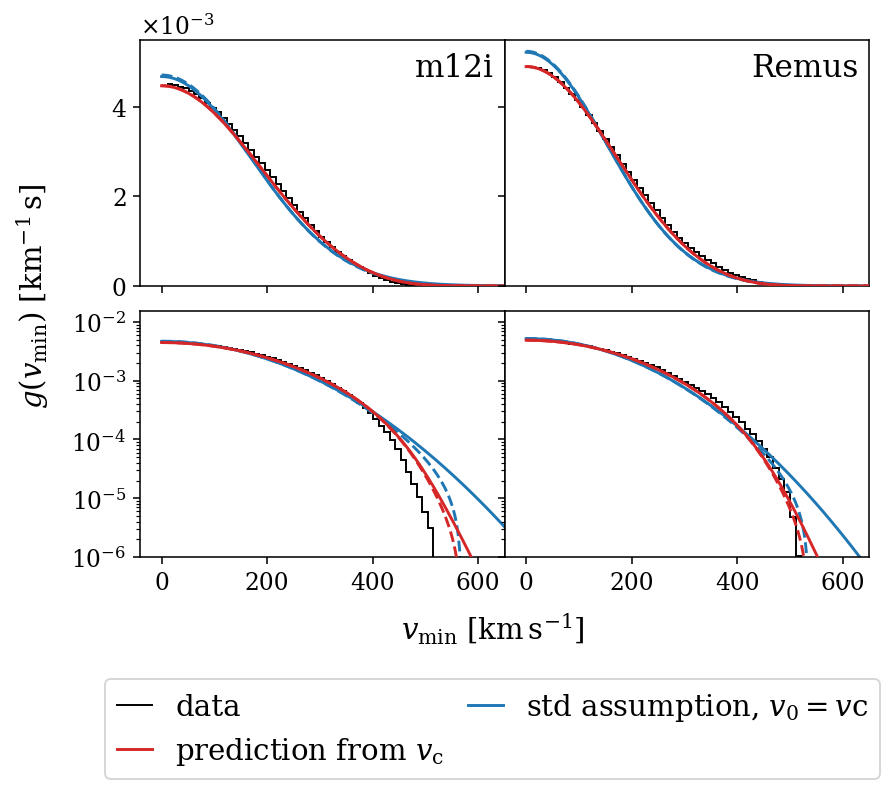

In [16]:
reload(dm_den_viz)
dm_den_viz.plt_halo_integrals_dblscale(['m12i', 'Remus'],
                                       'dm_stats_dz1.0_20230724.h5',
                                       prediction_vcut_type='lim_fit',
                                       std_vcut_type='lim_fit',
                                       show_mao_naive=False, 
                                       xmax=650.,
                                       show_std_vcut=False,
                                       logymin=1.e-6,
                                       tgt_fname='halo_integrals.png')

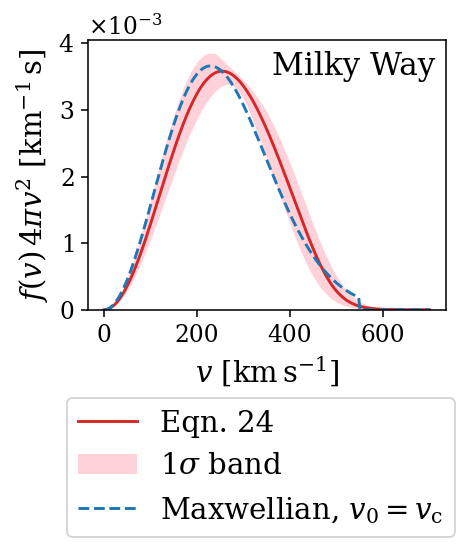

In [17]:
%matplotlib inline
reload(fitting)
reload(dm_den_viz)
dm_den_viz.plt_mw(tgt_fname='distrib_mw.png', 
                  vcut_type='vesc',
                  dvc=dm_den_viz.dvc_eilers, 
                  dpi=140, show_vcrit=False,
                  sigmoid_damped_eqnum=sigmoid_damped_eqnum)

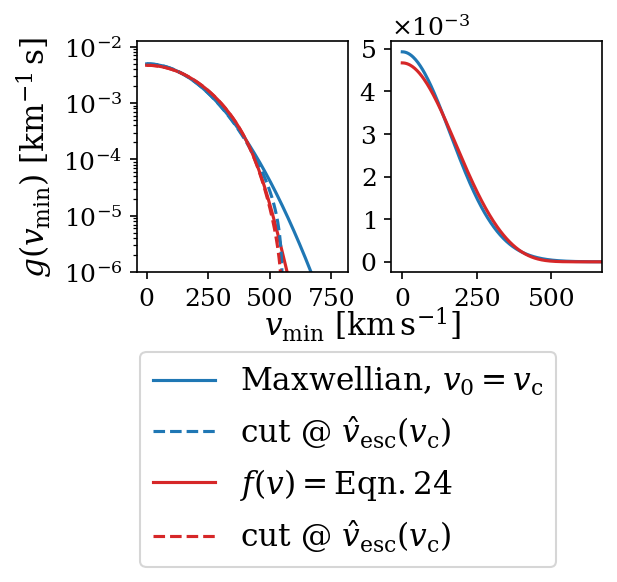

In [18]:
reload(dm_den_viz)
dm_den_viz.plt_halo_integral_mw('dm_stats_dz1.0_20230724.h5', 
                                tgt_fname='halo_integral_mw.png', 
                                xtickspace=250.,
                                sigmoid_damped_eqnum=sigmoid_damped_eqnum)

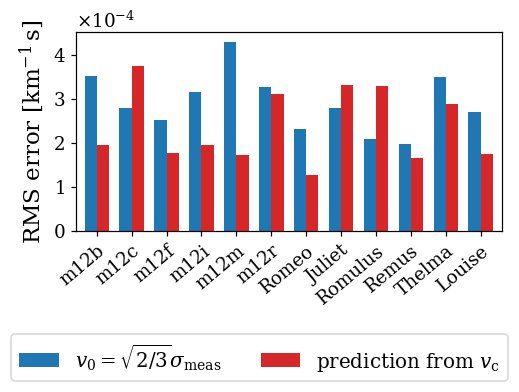

In [19]:
reload(fitting)
fitting.compare_methods(save_fname='rms.png', verbose=False)